### Unsupervised-learning Test (40 tasks) —
#### Customer Segmentation dataset (Kaggle)

#### Part A — Load & basic EDA (1–8)

In [46]:
#Load the CSV into a Pandas DataFrame and show the first 5 rows
import pandas as pd
mall = pd.read_csv("Mall_Customers.csv")
online = pd.read_excel("Online Retail.xlsx")
mall.head() #top 5 rows



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
online.head() #top 5 rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [48]:
# 2 Show the dataset shape (rows, columns) and column names with dtypes
mall.shape, mall.dtypes


((200, 5),
 CustomerID                 int64
 Genre                     object
 Age                        int64
 Annual Income (k$)         int64
 Spending Score (1-100)     int64
 dtype: object)

In [49]:
online.shape, online.dtypes

((541909, 8),
 InvoiceNo              object
 StockCode              object
 Description            object
 Quantity                int64
 InvoiceDate    datetime64[ns]
 UnitPrice             float64
 CustomerID            float64
 Country                object
 dtype: object)

In [50]:
# 3 Count unique values per column 
mall.nunique()


CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [51]:
# list the top 10 most frequent values in a categorical field
top_values= mall['Genre'].value_counts().head(10)
print(top_values)

Genre
Female    112
Male       88
Name: count, dtype: int64


In [52]:
# Count unique values per column 
online.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [53]:
# Top 10 most frequent values in a categorical field
top_countries = online['Country'].value_counts().head(10)
print(top_countries)

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: count, dtype: int64


In [54]:
#4 Find missing values per column and report counts
mall.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
online.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [56]:
# 5 Show summary statistics for numeric columns: mean, median, std, min, max, quartiles
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [57]:
online.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


In [58]:
#6 Convert a numeric column (e.g., Age) into bins (e.g., Young, Adult, Senior). Show counts by group
#Define bins and labels
bins = [0,17,60,120]  # Age groups
labels = ['Young', 'Adult', 'Senior']
mall['AgeGroup'] = pd.cut(mall['Age'], bins=bins, labels=labels)
mall['AgeGroup'].value_counts()

AgeGroup
Adult     183
Senior     17
Young       0
Name: count, dtype: int64

In [59]:
# 7 Detect and count any unrealistic values (e.g., negative or zero values)
negative_income = mall[mall['Annual Income (k$)'] <= 0]
print(f"Number of unrealistic Annual Income values: {negative_income.shape[0]}")
unrealistic_age = mall[mall['Age'] <= 0]
print(f"Number of unrealistic Age values: {unrealistic_age.shape[0]}")

Number of unrealistic Annual Income values: 0
Number of unrealistic Age values: 0


In [60]:
# 8 Find how many unique customers exist and which group/category is most common
unique_customers=mall['CustomerID'].nunique()
most_common_genre = mall['Genre'].mode()[0]
print(f"unique customers: {unique_customers}")
print(f"Most common Genre: {most_common_genre}")


unique customers: 200
Most common Genre: Female


#### Part B — Data cleaning & filtering (9–15)


In [61]:
#9 Remove rows with missing values in a key column and explain the pros/cons
mall_cleaned = mall.dropna(subset=['Age','Annual Income (k$)'])  #removing rows with missing Age,income

#Pros: Simplifies analysis, avoids errors in calculations
#Cons: Potentially loses valuable data, may introduce bias if missingness is not random
mall_cleaned.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup
0,1,Male,19,15,39,Adult
1,2,Male,21,15,81,Adult
2,3,Female,20,16,6,Adult
3,4,Female,23,16,77,Adult
4,5,Female,31,17,40,Adult


In [63]:
online_cleaned=online.dropna(subset=["CustomerID"])
online_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 10 Drop duplicate rows and report how many were dropped
mall_deduped = mall_cleaned.drop_duplicates()
print(f"Number of duplicate rows dropped: {mall_cleaned.shape[0] - mall_deduped.shape[0]}")
online_deduped = online_cleaned.drop_duplicates()
print(f"Number of duplicate rows dropped: {online_cleaned.shape[0] - online_deduped.shape[0]}")


Number of duplicate rows dropped: 0
Number of duplicate rows dropped: 5225


In [67]:
# 11 Filter out records where Age < 18
mall_adults = mall_deduped[mall_deduped['Age'] >= 18]
mall_adults.shape



(200, 6)

In [68]:
# 12 Create a new categorical column from numeric data using conditional statements
def income_level(income):
    if income < 40:
        return 'Low'
    elif 40 <= income < 70:
        return 'Medium'
    else:
        return 'High'
mall_adults['IncomeLevel'] = mall_adults['Annual Income (k$)'].apply(income_level)
mall_adults[['Annual Income (k$)', 'IncomeLevel']].head()
mall_adults['IncomeLevel'].value_counts()


IncomeLevel
Medium    78
High      76
Low       46
Name: count, dtype: int64

In [70]:
#13 Replace missing values in a numeric column with the mean
online_deduped['Quantity'].fillna(online_deduped['Quantity'].mean(), inplace=True)
online_deduped['Quantity'].isnull().sum()  #verify no missing values
online_deduped.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_12720\3254324796.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  online_deduped['Quantity'].fillna(online_deduped['Quantity'].mean(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_12720\3254324796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_deduped['Quantity'].fillna(onli

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# 14 Bucket customers into categories based on quantiles (e.g., spending level)
spending_bins = pd.qcut(mall_adults['Spending Score (1-100)'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
mall_adults['SpendingLevel'] = spending_bins
mall_adults['SpendingLevel'].value_counts()



SpendingLevel
Medium       53
High         52
Low          50
Very High    45
Name: count, dtype: int64

In [78]:
#15 Explain and apply feature scaling to numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mall_adults[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(mall_adults[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
mall_adults.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeLevel,SpendingLevel
0,1,Male,-1.424569,-1.738999,-0.434801,Adult,Low,Medium
1,2,Male,-1.281035,-1.738999,1.195704,Adult,Low,Very High
2,3,Female,-1.352802,-1.700830,-1.715913,Adult,Low,Low
3,4,Female,-1.137502,-1.700830,1.040418,Adult,Low,Very High
4,5,Female,-0.563369,-1.662660,-0.395980,Adult,Low,Medium


#### Part C — Aggregation & feature engineering (16–22)

In [79]:
#16 Compute average income by gender using groupby
average_income= mall_adults.groupby('Genre')['Annual Income (k$)'].mean()
print(average_income)

Genre
Female   -0.050002
Male      0.063639
Name: Annual Income (k$), dtype: float64


In [ ]:
#17 Calculate max, min, and mean for numeric columns per group
grouped_stats = mall_adults.groupby('Genre').agg({
    'Age': ['max', 'min', 'mean'],
    'Annual Income (k$)': ['max', 'min', 'mean'],
    'Spending Score (1-100)': ['max', 'min', 'mean']
})
print(grouped_stats)



             Age                     Annual Income (k$)                      \
             max       min      mean                max       min      mean   
Genre                                                                         
Female  2.091999 -1.496335 -0.053953           2.497807 -1.700830 -0.050002   
Male    2.235532 -1.496335  0.068668           2.917671 -1.738999  0.063639   

       Spending Score (1-100)                      
                          max       min      mean  
Genre                                              
Female               1.894492 -1.754735  0.051508  
Male                 1.816849 -1.910021 -0.065555  


In [81]:
#18 Create a new ratio feature (e.g., income-to-age)
mall_adults['IncomeToAgeRatio'] = mall_adults['Annual Income (k$)'] / mall_adults['Age']
mall_adults.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeLevel,SpendingLevel,IncomeToAgeRatio
0,1,Male,-1.424569,-1.738999,-0.434801,Adult,Low,Medium,1.220720
1,2,Male,-1.281035,-1.738999,1.195704,Adult,Low,Very High,1.357495
2,3,Female,-1.352802,-1.700830,-1.715913,Adult,Low,Low,1.257264
3,4,Female,-1.137502,-1.700830,1.040418,Adult,Low,Very High,1.495232
4,5,Female,-0.563369,-1.662660,-0.395980,Adult,Low,Medium,2.951284


In [82]:
#19 Flag “High value” customers based on income and spending greater than average.
average_income = mall_adults['Annual Income (k$)'].mean()
average_spending = mall_adults['Spending Score (1-100)'].mean()
mall_adults['HighValueCustomer'] = ((mall_adults['Annual Income (k$)'] > average_income) & (mall_adults['Spending Score (1-100)'] > average_spending))
mall_adults.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeGroup,IncomeLevel,SpendingLevel,IncomeToAgeRatio,HighValueCustomer
0,1,Male,-1.424569,-1.738999,-0.434801,Adult,Low,Medium,1.220720,False
1,2,Male,-1.281035,-1.738999,1.195704,Adult,Low,Very High,1.357495,False
2,3,Female,-1.352802,-1.700830,-1.715913,Adult,Low,Low,1.257264,False
3,4,Female,-1.137502,-1.700830,1.040418,Adult,Low,Very High,1.495232,False
4,5,Female,-0.563369,-1.662660,-0.395980,Adult,Low,Medium,2.951284,False


In [83]:
#20 Compute correlation between numeric features
correlation_matrix = mall_adults[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [84]:
#21 Determine which gender has a higher average spending score
average_sp=mall_adults.groupby('Genre')['Spending Score (1-100)'].mean()
print(average_sp)

Genre
Female    0.051508
Male     -0.065555
Name: Spending Score (1-100), dtype: float64


In [85]:
# 22 Create a pivot table by age group and gender for average spending
pivot_table = mall_adults.pivot_table(values='Spending Score (1-100)', index='AgeGroup', columns='Genre', aggfunc='mean')
print(pivot_table)



Genre       Female      Male
AgeGroup                    
Adult     0.061089 -0.032469
Senior   -0.117759 -0.297161


C:\Users\USER\AppData\Local\Temp\ipykernel_12720\3463724195.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = mall_adults.pivot_table(values='Spending Score (1-100)', index='AgeGroup', columns='Genre', aggfunc='mean')


#### Part D — Visualizations & group exploration (23–27)


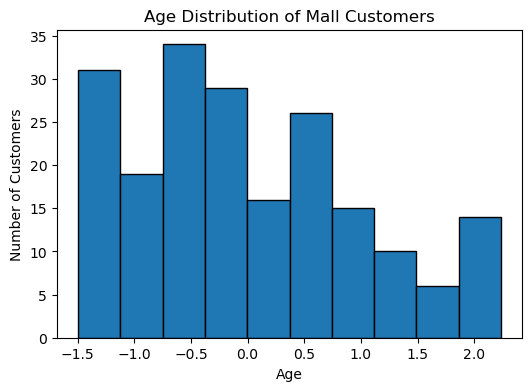

In [87]:
#23 Plot a histogram of the Age distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(mall_adults['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Mall Customers')
plt.show()

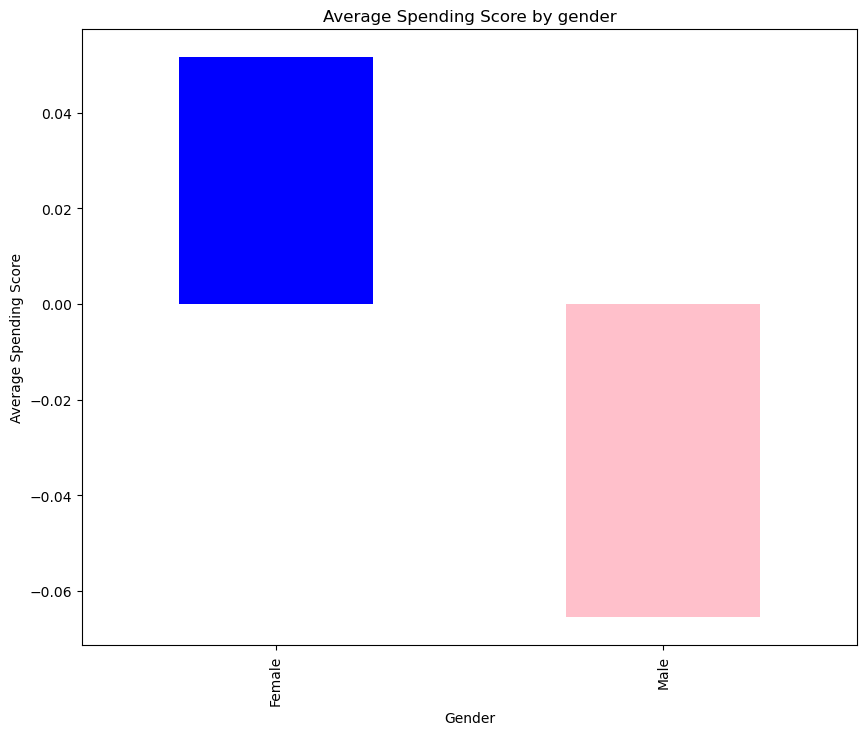

In [88]:
#24 Create a bar chart of average spending score by gender
average_sp=mall_adults.groupby('Genre')['Spending Score (1-100)'].mean()
plt.figure(figsize=(10,8))
average_sp.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Average Spending Score")
plt.title("Average Spending Score by gender")
plt.show()

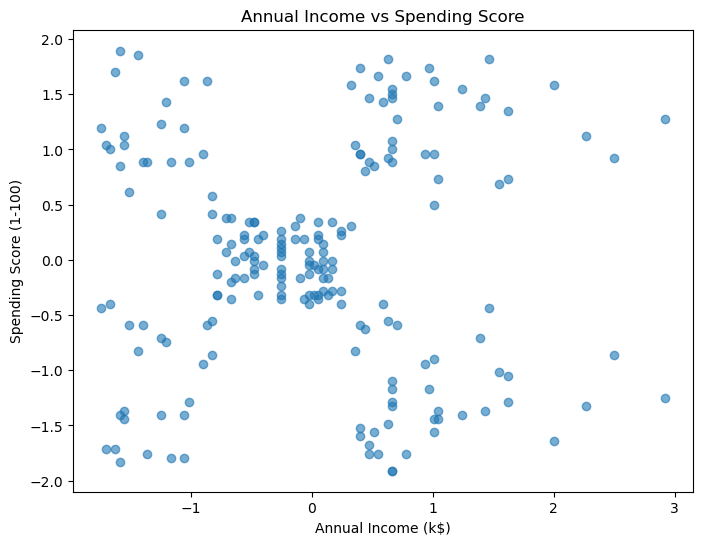

In [ ]:
# 25 Create a scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8,6))
plt.scatter(mall_adults['Annual Income (k$)'], mall_adults['Spending Score (1-100)'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12720\2899556383.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([mall_adults[mall_adults['AgeGroup'] == age_group]['Spending Score (1-100)'] for age_group in labels], labels=labels)


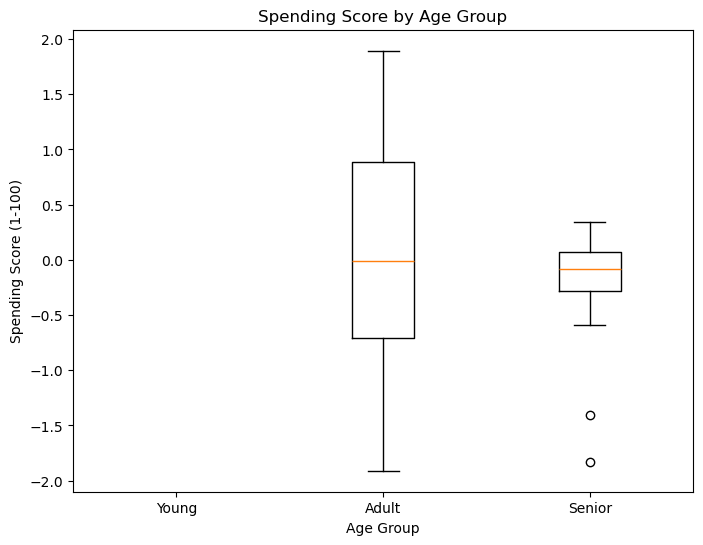

In [90]:
# 26 Create a boxplot of spending score grouped by age bins
plt.figure(figsize=(8,6))
plt.boxplot([mall_adults[mall_adults['AgeGroup'] == age_group]['Spending Score (1-100)'] for age_group in labels], labels=labels)
plt.xlabel('Age Group')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score by Age Group')
plt.show()

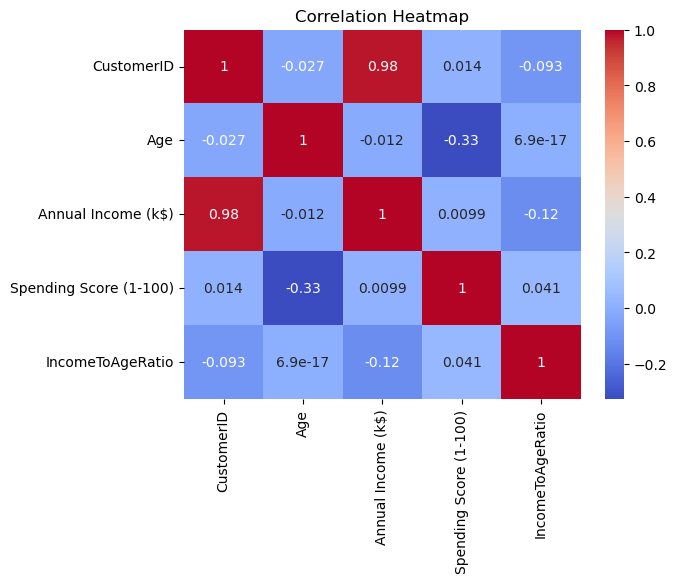

In [92]:
# 27 Create a heatmap of correlations between numeric features
import seaborn as sns
corr = mall_adults.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




#### Part E — Dimensionality reduction (PCA & t-SNE) (28–31)


Explained variance ratio: [0.50495142 0.49504858]


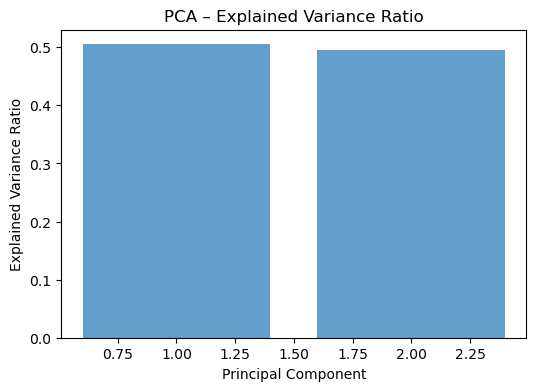

In [97]:
#28 Run PCA on standardized income and spending features and plot explained variance
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric features
x = mall_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# PCA
pca = PCA(n_components=2)  
x_pca = pca.fit_transform(x_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_var)

# Plot explained variance
plt.figure(figsize=(6,4))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA – Explained Variance Ratio')
plt.show()


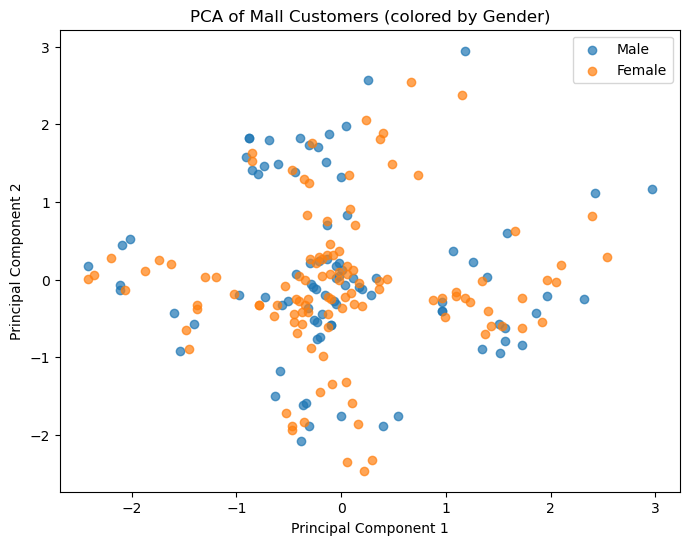

In [100]:
#  Plot 2D PCA components scatter colored by a category (e.g., Gender)
# Add PCA components to DataFrame
mall_cleaned['PC1'] = x_pca[:, 0]
mall_cleaned['PC2'] = x_pca[:, 1]

# Scatter plot colored by category (e.g. Gender)
plt.figure(figsize=(8,6))
categories = mall_cleaned['Genre'].unique()

for category in categories:
    subset = mall_cleaned[mall_cleaned['Genre'] == category]
    plt.scatter(subset['PC1'],subset['PC2'],label=category,alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Mall Customers (colored by Gender)')
plt.legend()
plt.show()





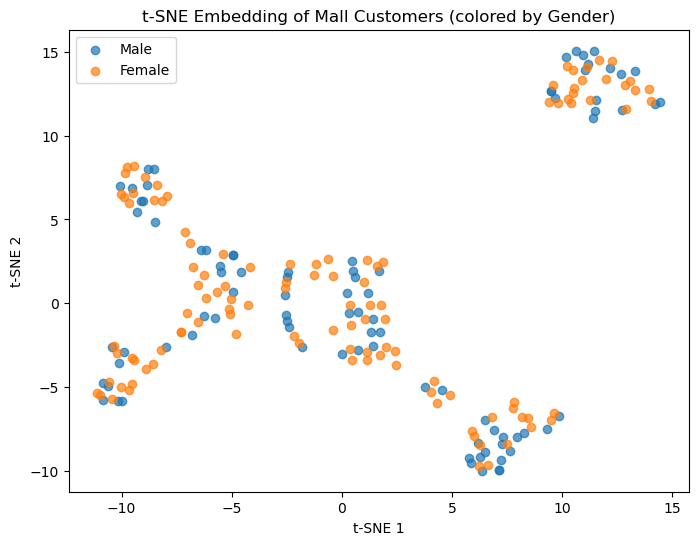

In [104]:
# 30 Run t-SNE and plot the 2D embedding
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_scaled)

# Add the t-SNE components to your DataFrame
mall_cleaned['TSNE1'] = x_tsne[:, 0]
mall_cleaned['TSNE2'] = x_tsne[:, 1]

# Plot the 2D t-SNE embedding colored by a category (e.g. Genre)
plt.figure(figsize=(8,6))
categories = mall['Genre'].unique()

for category in categories:
    subset = mall_cleaned[mall_cleaned['Genre'] == category]
    plt.scatter(subset['TSNE1'],subset['TSNE2'],label=category,alpha=0.7)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Embedding of Mall Customers (colored by Gender)')
plt.legend()
plt.show()


In [ ]:
#31 Compare PCA and t-SNE plots — which shows clearer clusters
# clearer clusters in the t-SNE plot than in the PCA plot

#### Part F — Clustering & evaluation (32–40)


c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

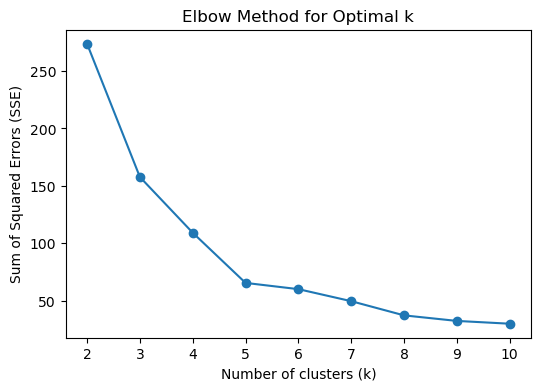

In [107]:
#32 Run k-means for k=2…10 on standardized features and plot the elbow curve
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()







c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

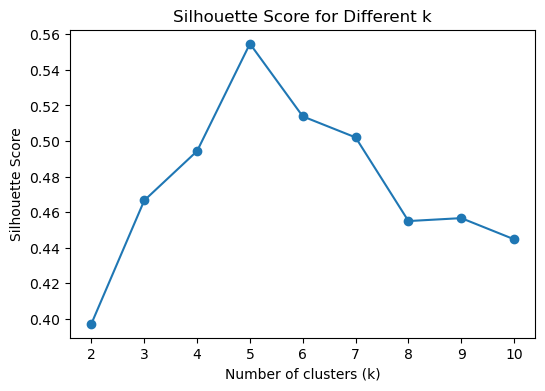

In [109]:
#33 Compute silhouette score for each k and identify the best k
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    silhouette_scores.append(score)
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')
plt.show()


c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


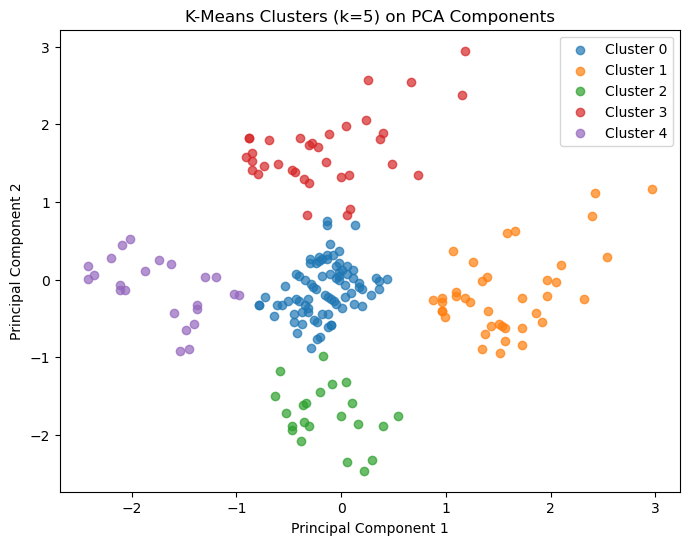

In [110]:
# 34 Plot clusters for the chosen k using a scatter plot
# Choose k based on elbow and silhouette analysis, e.g., k=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(x_scaled)
mall_cleaned['Cluster'] = labels
plt.figure(figsize=(8,6))
for cluster in range(k):
    subset = mall_cleaned[mall_cleaned['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters (k=5) on PCA Components')
plt.legend()
plt.show()


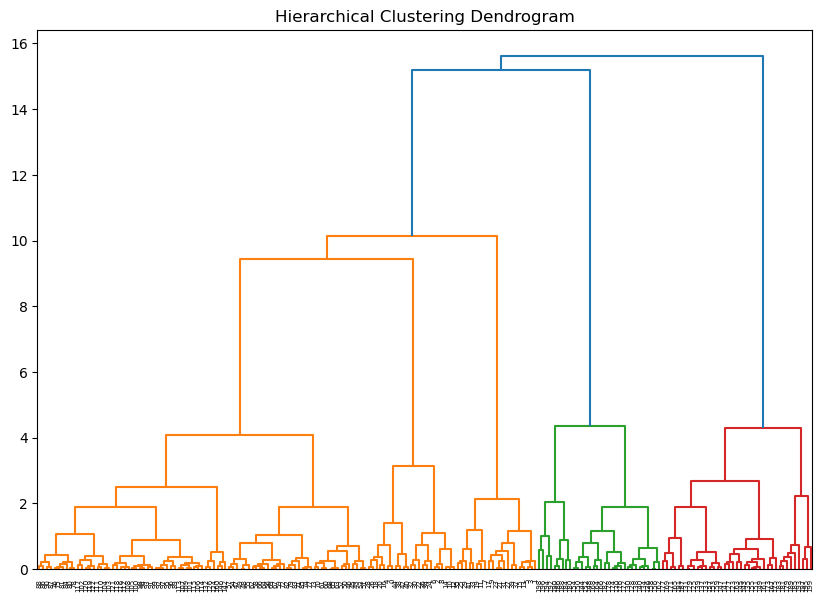

In [113]:
#35 Run hierarchical clustering and visualize a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
linked = linkage(x_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()



In [117]:
#36 Cut the dendrogram at k clusters and compare with k-means
k = 5  # choose number of clusters
hier_labels = fcluster(linked, k, criterion='maxclust')

# Run K-Means with same k
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

# Compare results
mall_cleaned['HierCluster'] = hier_labels
mall_cleaned['KMeansCluster'] = kmeans_labels

print(mall_cleaned[['Annual Income (k$)', 'Spending Score (1-100)', 
            'HierCluster', 'KMeansCluster']].head())



   Annual Income (k$)  Spending Score (1-100)  HierCluster  KMeansCluster
0                  15                      39            4              4
1                  15                      81            3              2
2                  16                       6            4              4
3                  16                      77            3              2
4                  17                      40            4              4


c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [118]:
#37 Profile each cluster: average age, income, spending score
profile = mall_cleaned.groupby('KMeansCluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print(profile)



                     Age  Annual Income (k$)  Spending Score (1-100)  Count
KMeansCluster                                                              
0              42.716049           55.296296               49.518519     81
1              32.692308           86.538462               82.128205     39
2              25.272727           25.727273               79.363636     22
3              41.114286           88.200000               17.114286     35
4              45.217391           26.304348               20.913043     23


In [120]:
# 38 Check cluster sizes — are some clusters too small?
# For hierarchical clusters
print("Hierarchical clustering sizes:")
print(mall_cleaned['HierCluster'].value_counts().sort_index())

# For K-Means clusters
print("\nK-Means clustering sizes:")
print(mall_cleaned['KMeansCluster'].value_counts().sort_index())


Hierarchical clustering sizes:
HierCluster
1    39
2    32
3    21
4    23
5    85
Name: count, dtype: int64

K-Means clustering sizes:
KMeansCluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64


In [121]:
#39 Run k-means with different random states and see if cluster assignments change
k = 5
kmeans1 = KMeans(n_clusters=k, random_state=42)
kmeans2 = KMeans(n_clusters=k, random_state=7)
labels1 = kmeans1.fit_predict(x_scaled)
labels2 = kmeans2.fit_predict(x_scaled)
# Compare cluster assignments
comparison = pd.DataFrame({'KMeans_42': labels1, 'KMeans_7': labels2})
print(comparison.head(10))


   KMeans_42  KMeans_7
0          4         4
1          2         0
2          4         4
3          2         0
4          4         4
5          2         0
6          4         4
7          2         0
8          4         4
9          2         0


c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [122]:
#40 Export the dataset with cluster labels to CSV
mall_cleaned.to_csv("Mall_Customers_Clustered.csv", index=False)



